# Project: Investigate a Dataset - TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### TMDb Movies Dataset

> The dataset to be analyzed has 10,866 movie entries and 21 columns (before cleaning). The columns specify:
id, imdb_id, Popularity, Budget, Revenue, Original title, Cast, Homepage, Director, Tagline, Keywords, Overview, Runtime, Genres, Production Companies, Release Date, Vote Count, Vote Average, Release Year, and Budget and Revenue in 2010 dollars (accounting for inflation)


### Question(s) for Analysis

>- <a href="#Q1">Q1</a>: Has movies' runtime changed over the years?
>- <a href="#Q2">Q2</a>: Has the number of yearly released movies changed over the years?
>- <a href="#Q3">Q3</a>: What genres are produced more?
>- <a href="#Q4">Q4</a>: What production companies have produced more movies?
>- <a href="#Q5">Q5</a>: Which directors made more movies, and which of them had high total revenue?
>- <a href="#Q6">Q6</a>: Is there a correlation between the profit a movie makes and other characteristics?

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

<a id='wrangling'></a>
## Data Wrangling

In [254]:
#reading the csv file
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### It's safe to say that certain columns aren't relevant to the analysis, these include: imdb_id, homepage, tagline, keywords, overview, release_date, budget_adj, and revenue_adj

In [256]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace = True)

In [257]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015



### Data Cleaning


> **Checking for any duplicates and dropping them**

In [258]:
df.duplicated().sum()

1

In [259]:
#this function will drop the duplicate row and update the original dataframe
df.drop_duplicates(inplace = True)

In [260]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

> **Since only 17 entries have missing values in the "genres" column, we can simply drop them**

In [261]:
df.dropna(axis=0, inplace=True, subset=['genres'])

In [262]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
director                  42
runtime                    0
genres                     0
production_companies    1016
vote_count                 0
vote_average               0
release_year               0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
<a id='Q1'></a>
### Q1: Has movies' runtime changed over the years?

>__According to the Academy, a feature film has to be at least 40 minutes long, so I'm only going to include these movies__

In [263]:
df = df[df.runtime > 40]

In [264]:
df.describe().runtime

count    10597.000000
mean       104.215816
std         28.436477
min         41.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

### Shortest and Longest Movie Titles

In [265]:
#this will return the movies with the shortest runtime in the dataset
df.query('runtime == runtime.min()').loc[:, ['original_title', 'runtime']]

,original_title,runtime
1029,"Marvel: 75 Years, From Pulp to Pop!",41
1750,Hulk vs. Thor,41
1752,Under the Sea 3D,41
4874,Amy Schumer: Mostly Sex Stuff,41
6691,Deep Sea 3D,41


In [266]:
#this will return the movies with the longest runtime in the dataset
df.query('runtime == runtime.max()').loc[:, ['original_title', 'runtime']]

,original_title,runtime
3894,The Story of Film: An Odyssey,900


> ***The shortest movies are 41 mintues long, and the longest one is 15 hours long***

In [267]:
# a function to put values above bars in a graph
def vals_on_bars (graph, fsize):
    """this function takes 2 arguments, graph and fsize
    graph: a bar plot or a histogram handler for which we want to annotate the values over the bars
    fsize: an int fontsize for the desired annotations depending on the graph's size
    return: None """
    for ptch in graph.patches:
        plt.annotate(ptch.get_height(), (ptch.get_x() + ptch.get_width() / 2, ptch.get_height()), ha = 'center', va = 'center', fontsize = fsize, xytext = (0, 10), textcoords = 'offset points')

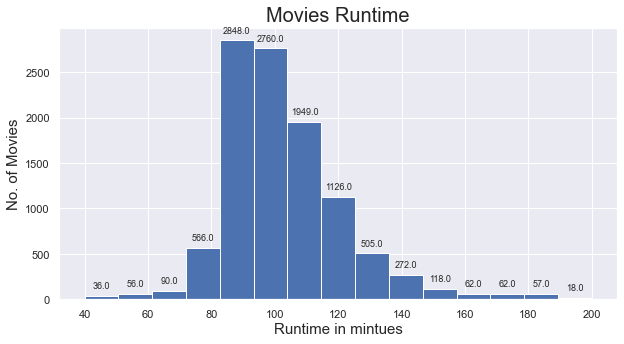

In [268]:
#displaying the runtime histogram
fig, rt_hist  = plt.subplots(figsize=(10,5))
plt.hist(df.runtime, range=(40,200), bins = 15, ec='w')
plt.title('Movies Runtime', fontsize= 20)
plt.xlabel('Runtime in mintues', fontsize= 15)
plt.ylabel('No. of Movies', fontsize= 15)
vals_on_bars(rt_hist, 9)
plt.show()

> ***We Can see that most movies are between 90 to 110 minutes long***

***Now we group movies by 'release_year' to see how runtime have changed over the years***

In [269]:
#we use groupby() to group the movie entries
grp_by_year = df.runtime.groupby(df['release_year'])
mean_rt_by_year = grp_by_year.describe()['mean']

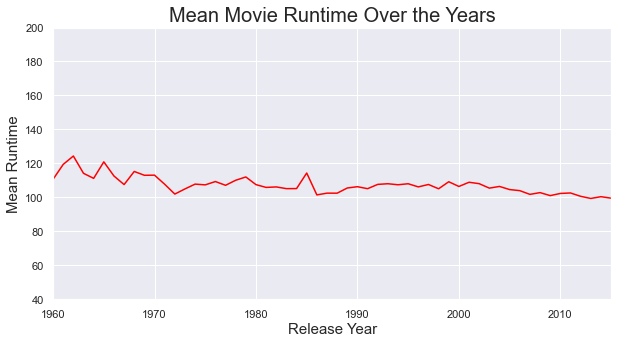

In [270]:
#displaying the mean runtime over the years graph
fig, rtplt = plt.subplots(figsize=(10,5))
rtplt.plot(mean_rt_by_year, color = 'red')
rtplt.set_xlim([1960,2015])
rtplt.set_ylim([40,200])
rtplt.set_title('Mean Movie Runtime Over the Years', fontsize=20)
rtplt.set_xlabel('Release Year', fontsize=15)
rtplt.set_ylabel('Mean Runtime', fontsize=15)
plt.show()

> ***As we can see, the mean movie runtime hasn't changed significantly over the years***

<a id='Q2'></a>
### Q2: Has the number of yearly released movies changed over the years?

> *we can answer that question using seaborn's __countplot__*

C:\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


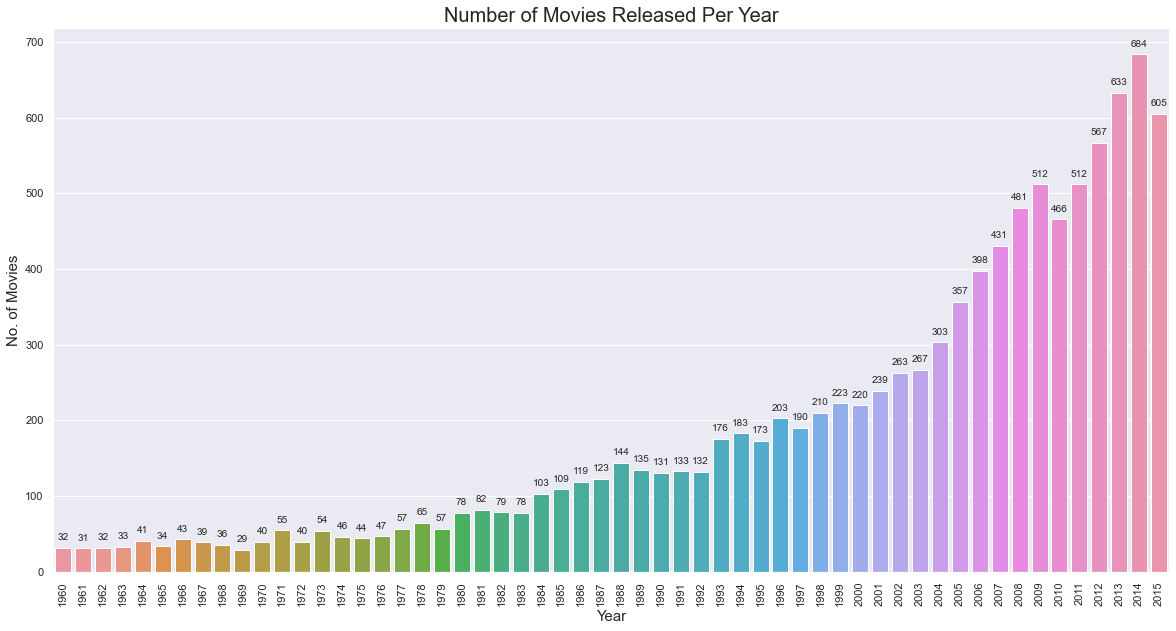

In [271]:
#displaying the number of yearly releases graph
plt.figure(figsize=(20,10))
count_graph = sns.countplot(df.release_year)
plt.title('Number of Movies Released Per Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('No. of Movies', fontsize=15)
plt.xticks(rotation=90)
vals_on_bars(count_graph, 10)
plt.show()

> **As we can see, the number of yearly released movies has increased with time**

In [272]:
movies_per_year = df.release_year.value_counts()
movies_per_year[movies_per_year == movies_per_year.max()]

2014    684
Name: release_year, dtype: int64

In [273]:
movies_per_year[movies_per_year == movies_per_year.min()]

1969    29
Name: release_year, dtype: int64

In [274]:
df.describe().release_year

count    10597.000000
mean      2001.213834
std         12.824311
min       1960.000000
25%       1994.000000
50%       2005.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

> **The largest number of movies was 684 and they were released in 2014, while the Smallest number of movies was 29 and they were released in 1969**

### so we can conclude that there has been a drastic change in the number of yearly released movies, as about 50% of the movies in this dataset have been released after 2005

<a id='Q3'></a>
### Q3: What genres are produced more?

>We can use the ```get_dummies()``` function to categorize the different genres

In [275]:
#the get_dummies() function return a df with a row that contains 1 or 0
#depending on each genres entry in the original df
genres = df['genres'].str.get_dummies(sep='|')

In [276]:
#counting each genre
genres_counts = genres.sum().reset_index()

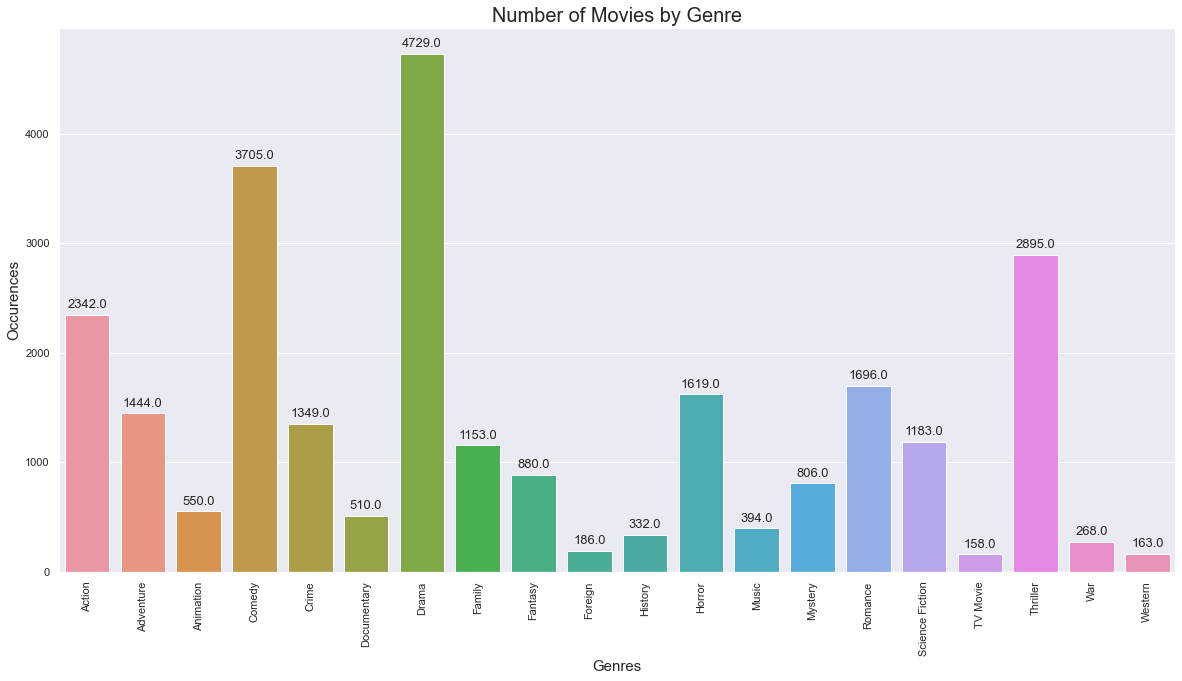

In [277]:
#displaying the genres graph
plt.figure(figsize=(20,10))
gen_graph = sns.barplot(x=genres.columns, y=genres.sum(), data=genres_counts)
plt.title('Number of Movies by Genre', fontsize=20)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Occurences',fontsize=15)
plt.xticks(rotation = 90)
vals_on_bars(gen_graph, 13)
plt.show()

### We can see that the top most produced genres are Drama, Comedy, Thriller,  and then Action.

<a id='Q4'></a>
### Q4: What production companies have produced more movies?

In [278]:
#usint the get_dummies() function to categorize the production companies
prod_comps = df['production_companies'].str.get_dummies(sep='|')

In [279]:
#counting each company's movies
prod_comps_count = prod_comps[prod_comps.columns].apply(lambda x: sum(x.values))

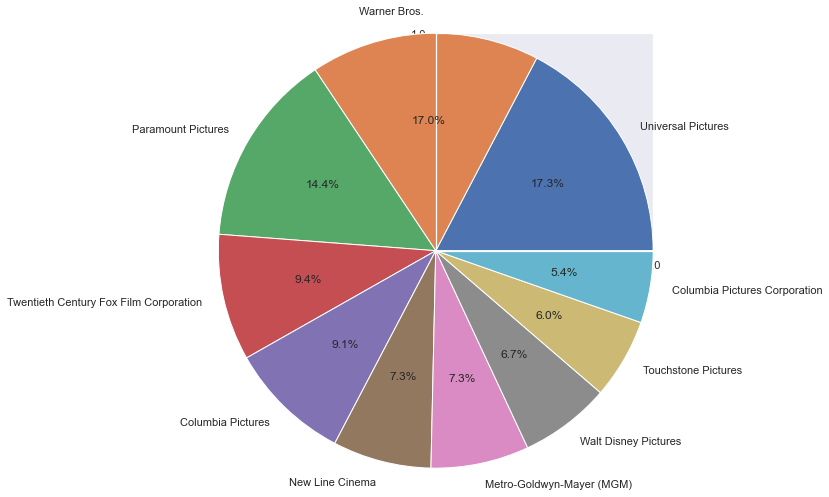

In [280]:
#displaying the production companies pie chart
prod_comps_count.sort_values(0, ascending=False).head(10).plot.pie(autopct="%1.1f%%", frame=True)
plt.show()

### We can see in this pie chart the top 10 companies in terms of number of movies produced.
### The top 3 companies are:
#### 1- Universal Pictures
#### 2- Warner Brothers
#### 3- Paramount Pictures

<a id='Q5'></a>
### Q5: Which directors made more movies, and which of them had high total revenue?

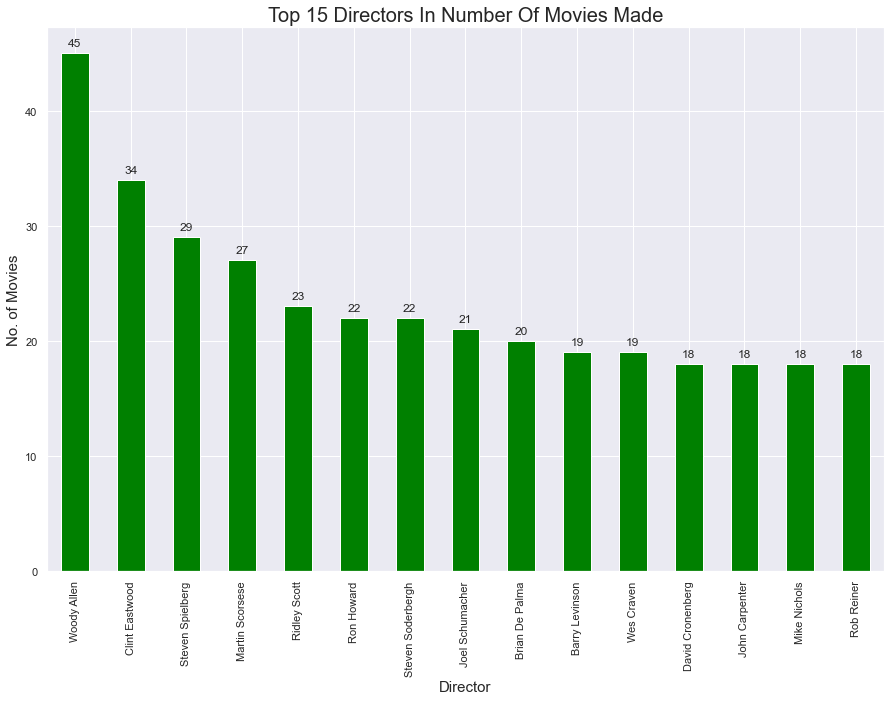

In [281]:
#displaying the top 15 directors who made more movies chart
plt.subplots()
top_directors = df['director'].value_counts().head(15)
dir_graph = top_directors.plot.bar(color='green', figsize=(15,10))
vals_on_bars(dir_graph, 12)
plt.title('Top 15 Directors In Number Of Movies Made', fontsize=20)
plt.xlabel('Director', fontsize=15)
plt.ylabel('No. of Movies',fontsize=15)
plt.show()

In [282]:
top_directors['Woody Allen']

45

### As we can see the top director with the most movies is Woody Allen with 45 movies to his name

#### Now we see if directors with the most movies are the ones with the highest revenues

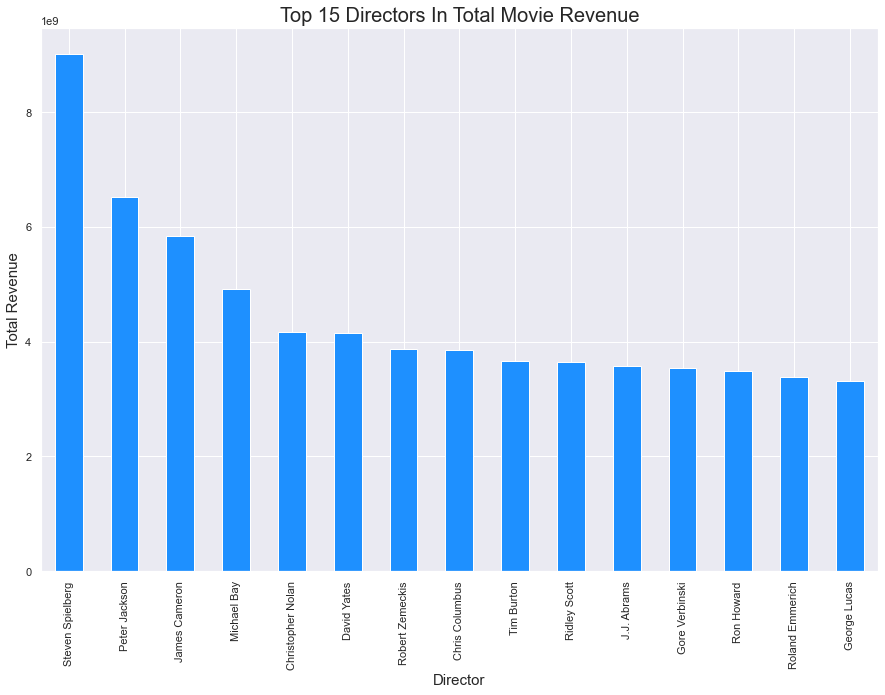

In [283]:
#displaying the top 15 directors who made more revenue chart
plt.subplots()
rev_by_dir = df.groupby('director').sum()['revenue'].sort_values(ascending=False).head(15)
rev_graph = rev_by_dir.plot.bar(color='dodgerblue', figsize=(15,10))
plt.title('Top 15 Directors In Total Movie Revenue', fontsize=20)
plt.xlabel('Director', fontsize=15)
plt.ylabel('Total Revenue',fontsize=15)
plt.show()

In [284]:
top_directors = pd.Series(top_directors, name='no of movies')
rev_by_dir = pd.Series(rev_by_dir, name='revenue')
dirs = pd.concat([top_directors, rev_by_dir], axis=1).dropna()
dirs

,no of movies,revenue
Steven Spielberg,29.0,9.018564e+09
Ridley Scott,23.0,3.649996e+09
Ron Howard,22.0,3.484472e+09


>***We can see that only 3 directors are in both the top 15 with the most movies and the top 15 with the highest total revenue, and these are: Steven Spielberg, Ridley Scott, and Ron Howard***

<a id='Q6'></a>
### Q6: Is there a correlation between the profit a movie makes and other characteristics?

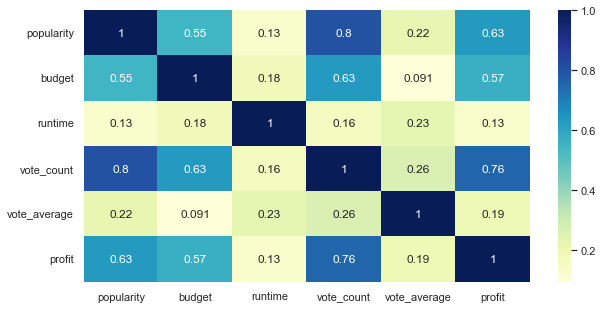

In [285]:
#creating a new column for profit
df['profit'] = df['revenue'] - df['budget']
#displaying a heatmap of correlation
plt.figure(figsize=(10,5))
correlation = df.loc[:, ['popularity', 'budget', 'runtime', 'vote_count', 'vote_average', 'profit']].corr()
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

### From the previous heatmap we can see that the characteristics of highest correlation with profit are vote count, popularity, and then budget


> ___We can study the correlation between profit and popularity as such:___

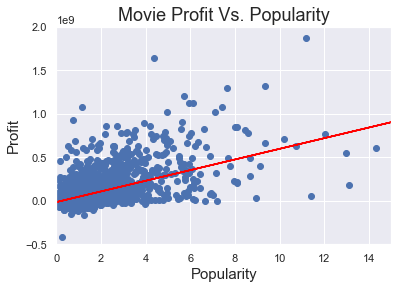

In [286]:
#displaying profit vs popularity scatter plot
fig, sct = plt.subplots()
plt.scatter(df.popularity, df.profit)
sct.set_title('Movie Profit Vs. Popularity', fontsize=18)
sct.set_xlabel('Popularity',fontsize=15)
sct.set_ylabel('Profit', fontsize=15)
sct.set_ylim([-0.5e9,2e9])
sct.set_xlim([0,15])
plt.plot(df['popularity'], np.poly1d(np.polyfit(df['popularity'], df['profit'], 1))(df['popularity']), color = 'red')
plt.show()

### We can see that the trendline shows that the movies that are more popular made more profit on average

<a id='conclusions'></a>
## Conclusions

This project has analyzed the tmdb movie dataset and tried to answer these questions as much as possible:
>- **Q1: Has movies' runtime changed over the years?**
It was clear that despite some fluctuations in the average runtime over the period in which these movies were released, the average runtime for movies hasn't changed significantly, and as shown in the provided graphs, most movies runtime reside between the 90 to 110 minutes marks. And the reason why it might seem like movies have gotten longer with time, is may be due to the fact that we're starting to have much less of an attention span because of technology and the many different ways we can get instant gratification.

>- **Q2: Has the number of yearly released movies changed over the years?**
The number of released movies per year has increased significantly over time, which makes sense considering the fact that it's become much easier to make feature films in the recent years due to the availability of equipment and human resources. The exponential growth of the number of movies made per year is also indicated in the fact that 50% of movies in this dataset were released after 2005, which is very recent.

>- **Q3: What genres are produced more?**
The most produced genres are Drama, Comedy, Thriller, and then Action. Although the analysis is limited in this regard, but on face value, the reason for that distribution might be because the first 2 genres are easier to produce and require less budget, while the second 2 have high chances of higher profits.

>- **Q4: What production companies have produced more movies?**
According to the data, the top 3 production companies are Universal Pictures, Warner Brothers, and Paramount Pictures. And although the data is also limited in this regard, but it's clear that companies with higher net worth are going to be the ones producing more movies, and with a simple google search we can confirm that these 3 companies are also among the top production companies in terms of net worth.

>- **Q5: Which directors made more movies, and which of them had high total revenue?**
The director with the most movies to his name is Woody Allen, with 45 movies in his record, and the one with the highest total revenue is Steven Spielberg. We can see however that only Steven Spielberg, Ridley Scott, and Ron Howard are included in both the top 15 in total revenue and most movies. The reason for that could be because most directors that made more movies make usually low-budget or indie movies, which don't get the highest revenues.

>- **Q6: Is there a correlation between the profit a movie makes and other characteristics?**
The correlation between the characteristics in the dataset differs. But as far as the profit, there are 3 main characteristics with high correlation with profit, these being: vote count, popularity, and then budget. When analyzing the correlation between popularity and profit, we find that on average the movies with higher popularity also made more profit.

### Limitations
>- It's not clear how the **popularity** metric was evaluated, so it's not easy to say how accurate the analysis regarding popularity is.
>- It's hard to suggest a specific criteria for a movie to be financially successful or popular because there are many more variables that affect these variables which aren't included in the dataset.